In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [85]:
data = pd.read_csv("Telco-Customer-Churn.csv")
df = pd.DataFrame(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Replace blanks with 0 as tenure is 0 and no total charges are recorded

In [18]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df.isnull().sum().sum()

np.int64(0)

In [63]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [24]:
df["customerID"].duplicated().sum()

np.int64(0)

#Converted 0 and 1 values of senior citizen to Yes/No to make it easier to understand

In [25]:
def conv(value):
    if value == 1:
      return "Yes"
    else:
      return "No"
df ["SeniorCitizen"] = df ["SeniorCitizen"].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


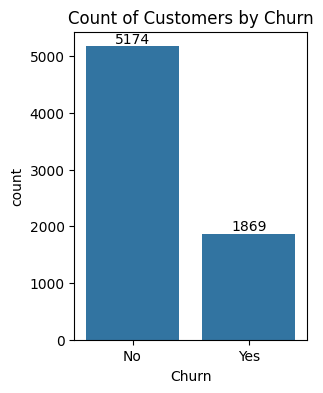

In [62]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = df["Churn"])
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

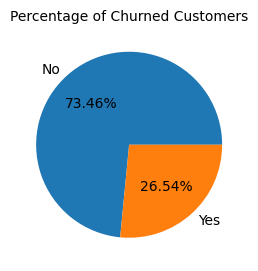

In [51]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index , autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#From the given pie chart we can conclude that 26.54% of our customers have churned out. 

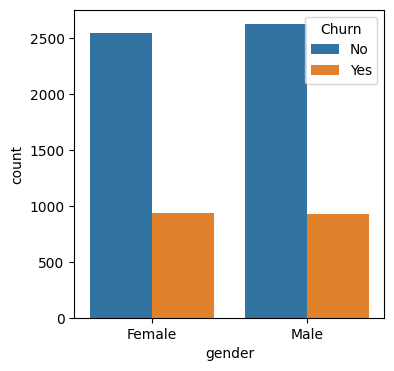

In [59]:
plt.figure(figsize = (4,4))
sns.countplot(x = df["gender"], hue = df["Churn"])
plt.show()

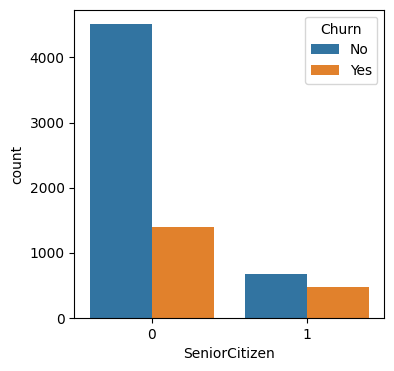

In [86]:
plt.figure(figsize = (4,4))
sns.countplot(x = df["SeniorCitizen"], hue = df["Churn"])
plt.show()

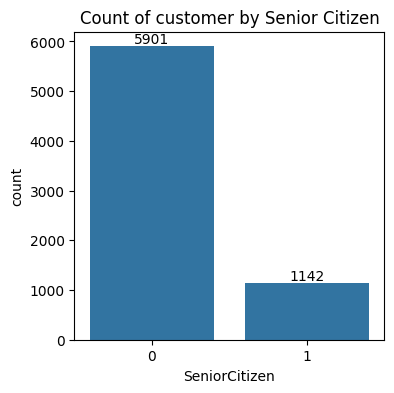

In [92]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = df["SeniorCitizen"])
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Senior Citizen")
plt.show()

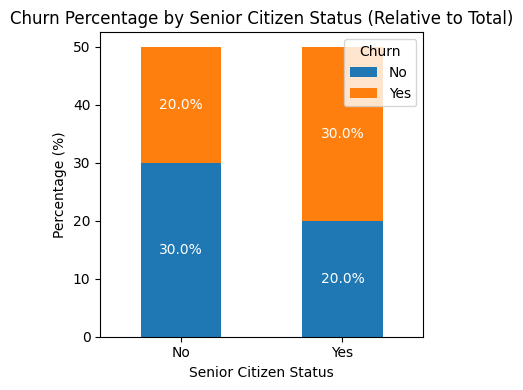

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual DataFrame)
# df = pd.read_csv("your_data.csv")

# Calculate the counts of each category
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate total counts
total_counts = count_data.sum().sum()  # Grand total of all counts

# Calculate percentages based on total
percentage_data = count_data / total_counts * 100

# Plotting
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(4, 4))

# Adding labels and title
plt.title('Churn Percentage by Senior Citizen Status (Relative to Total)')
plt.ylabel('Percentage (%)')
plt.xlabel('Senior Citizen Status')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])

# Adding percentage labels on each segment
for i in range(len(percentage_data)):
    total = 0
    for j in range(len(percentage_data.columns)):
        total += percentage_data.iloc[i, j]
        ax.text(i, total - percentage_data.iloc[i, j] / 2, f'{percentage_data.iloc[i, j]:.1f}%', 
                ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

#Comparative a greater pecentage of people in senior citizen category have churned.

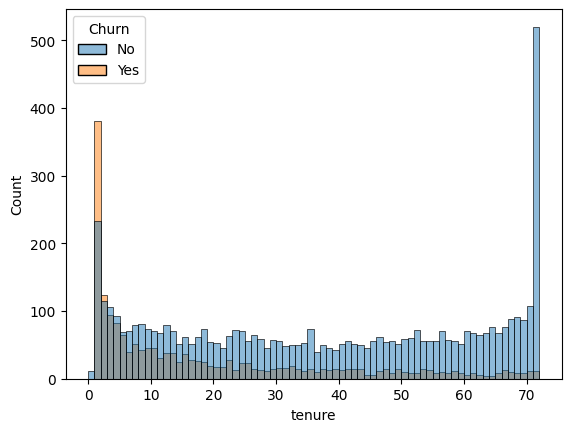

In [99]:
sns.histplot(x = df["tenure"], bins = 72, hue = df["Churn"])
plt.show()

#people who have used our services for a long time have stayed and poeple who have used our services for 1 or 2 month have Churned

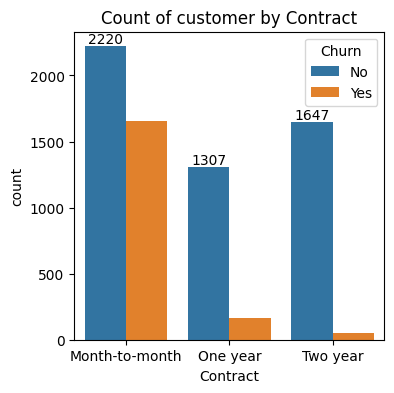

In [101]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = df["Contract"] , hue = df["Churn"])
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Contract")
plt.show()

#People who have month to month contract are likely to churn then from those  who have 1 or 2 years of contract

In [102]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

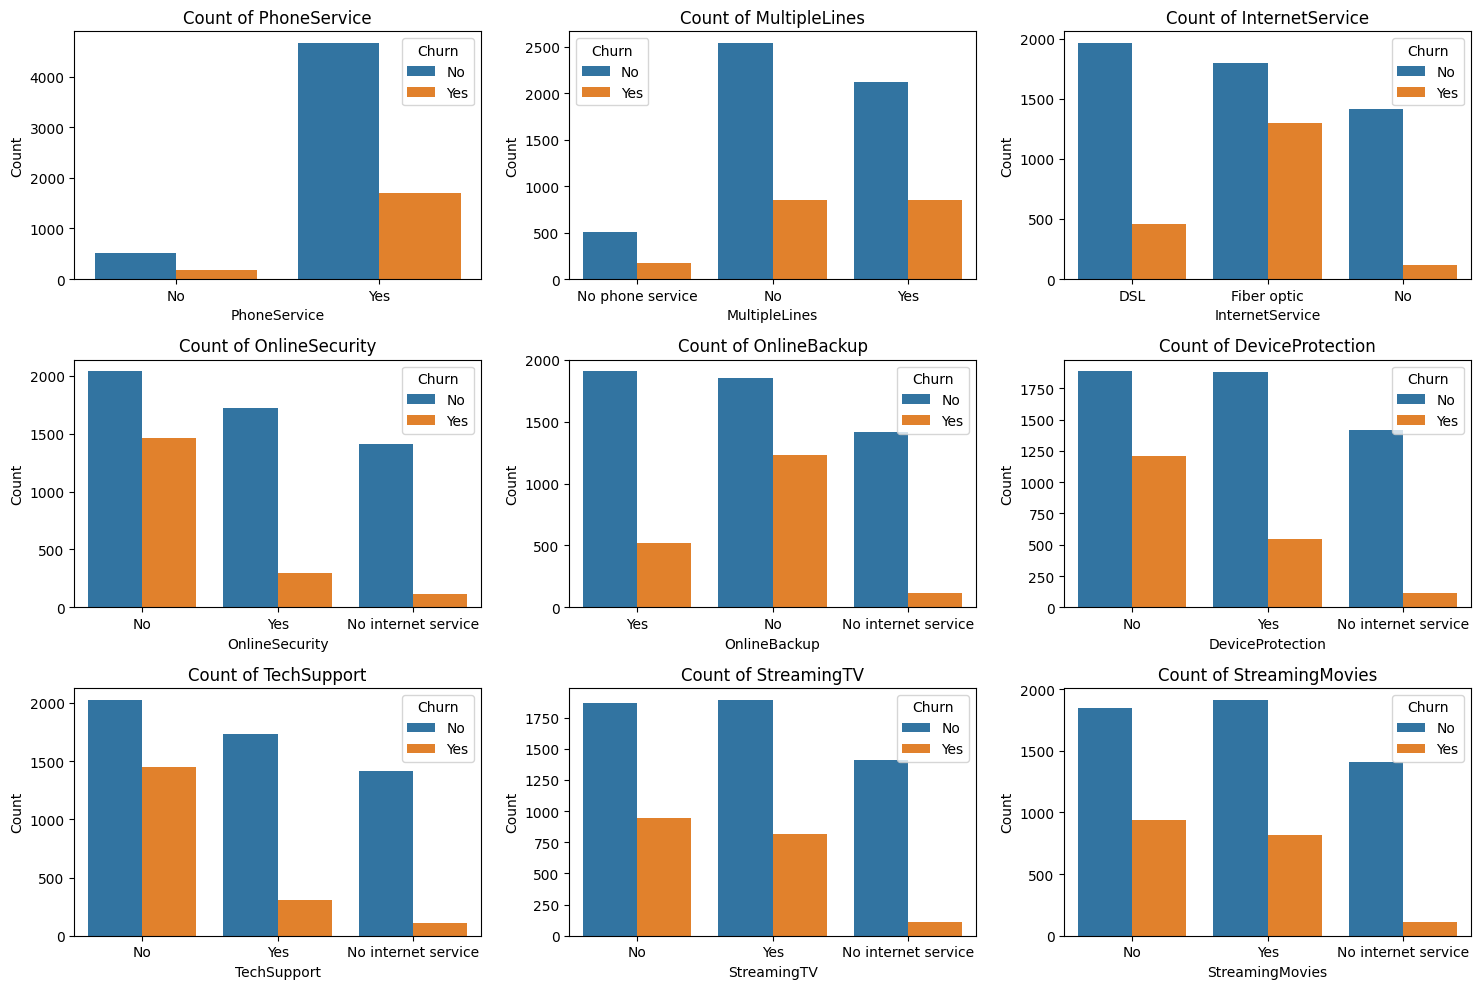

In [105]:
# Sample data (replace this with your actual DataFrame)
# df = pd.read_csv("your_data.csv")

# List of columns to plot
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the number of subplots
n = len(columns_to_plot)
ncols = 3  # Number of columns in the subplot grid
nrows = (n + ncols - 1) // ncols  # Calculate number of rows needed

# Create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Generate count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i], hue = "Churn")
    axes[i].set_title(f'Count of {column}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Customers with fiber optic internet, no online security, and no online backup services tend to have higher churn rates.
#Value-added services like online security, backup, and device protection appear to improve retention. 
#Additionally, fiber optic customers show a notable churn, indicating potential dissatisfaction or unmet expectations with this service type

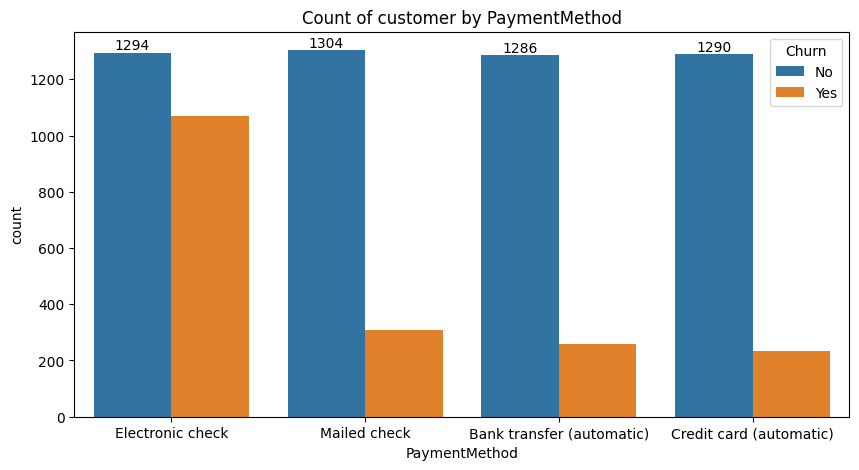

In [109]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = df["PaymentMethod"] , hue = df["Churn"])
ax.bar_label(ax.containers[0])
plt.title("Count of customer by PaymentMethod")
plt.show()